  % outliers col_name
0       20.0        1
  % outliers col_name
0       20.0        1
1       20.0        2


C:\Users\Usha\Anaconda3\lib\site-packages\ipykernel_launcher.py:158: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
C:\Users\Usha\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


  % outliers col_name
0       20.0        1
1       20.0        2
2       20.0        3


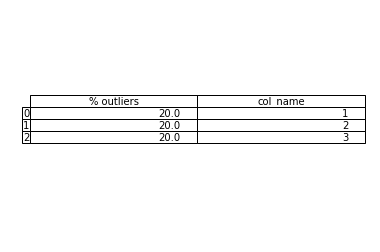

In [11]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.tools.plotting import table

filepath='C:\\Users\\Usha\\Downloads\\Book4.csv'

def statistics(filepath):

    
    newDF = pd.DataFrame()
    
    df = pd.read_csv(filepath)

    #get only the numeric values of dataframe

    pp=df._get_numeric_data()

    first_col = list(pp)

    sha=pp.shape

    no_rows=sha[0]

    #calculating quantiles

    s=pp[first_col[0]].quantile([0.25,0.5,0.75])

    

    i=1

    while(i<len(first_col)):

        s=s.append(pp[first_col[i]].quantile([0.25,0.5,0.75]))

        i=i+1

    

    r=s.tolist()

    #done calc quantiles

    #variables int

    i=0

    cols=[]

    q=np.zeros(len(first_col))

    a=[]

    b=[]

    c=[]

    d=[]

    low=[]

    high=[]

    k=0

    j=0

    

    #putting quantiles in respective lists

    while(i<len(r)):

        if(i%3==0):

            a.append(r[i])

        elif(i%3==1):

            b.append(r[i])

        else:

            c.append(r[i])

        i=i+1

    #end    

    #calculating 1.5IQR

    while((k*3)<len(r)):

        d.append(1.5*(c[k]-a[k]))

        k=k+1

   #end

    

    #calc boundry values

    while((j*3)<len(r)):

        low.append(a[j]-d[j])

        high.append(b[j]+d[j])

        j=j+1

    c=0

    #end calc boundry values

    #counting outliers

    while(c<len(first_col)):

        for z in first_col[c]:

            

            for y in z:

                g=0

                while(g<=(pp[y].size-1)):

                    if((pp[y][g])>high[c]):                        

                        q[c]=q[c]+1

                    g=g+1            

        c=c+1

     #end counting outliers

    #printing percentage and column name

    c=0

    while(c<len(first_col)):

        q[c]=(q[c]/no_rows)*100

        newDF = newDF.append({'col_name':first_col[c],'% outliers':str(q[c])},ignore_index=True)

        print(newDF)
        
        ax = plt.subplot(111)
           
        table(ax, newDF, loc='center')

        ax.set_axis_off()

        plt.savefig('outliers'+str(c)+'.png')

        c=c+1
    #end printing

    #function end

statistics(filepath)